# Homework 2

[link text](https://)[link text](https://)## **Sai Chandana Vallam Kondu, 023810339**

# Building a Deep Neural Network: Step by Step

Welcome to your second assignment! You have previously trained a 2-layer Logistic Regression Neural Network. This week, you will build a deep neural network, with as many layers as you want! THe code and structure of this assignment comes from Deep AI course taught by Andrew Ng on Coursera.

**Outline of Assignment**
1. Read through the codes in sections 1 through 5 and make sure that you understand the feedforward processing in the model.
2. In section 6, the backpropagation processing, you will need to add in code to perform the back propagation processing in the four routines.
3. Section 7: run your complete model and observe the error optimization. Answer the questions. This would be a good time to go into the Runtime menu and change your Runtime Type to use the GPUs.
4. Section 8: look at the training and testing accuracy results and analyze what is happening with your network. Map out a plan for improving your results using regularization and optimization methods. This will be your plan for part 2 of this assignment.

**After this assignment you will be able to:**
- Use non-linear units like ReLU to improve your model
- Build a deep neural network
- Implement an easy-to-use neural network class

**Notation**:
- Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer.
    - Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
- Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example.
    - Example: $x^{(i)}$ is the $i^{th}$ training example.
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).
    
    
**IMPORTANT NOTE:**
In the code, W is W Transpose with dimensions [dimension of layer output, dimension of layer input].


## 1.0 - Import test cases and packages

### 1.1 - Packages

Now, let's first import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the main package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work. Please don't change the seed.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import h5py
import pickle
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1.2 - Test cases

Now, let's first import all the test cases that you will need during this assignment.
- the test case file is also attached to your homework files as a python file, but running it here as a notebook cell might make it easier

In [ ]:
# testCases Python Functions
import numpy as np

def linear_forward_test_case():
    np.random.seed(1)
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = np.array([[1]])
    """
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)

    return A, W, b

def linear_activation_forward_test_case():
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = 5
    """
    np.random.seed(2)
    A_prev = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    return A_prev, W, b

def L_model_forward_test_case():
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    parameters = {'W1': np.array([[ 1.62434536, -0.61175641, -0.52817175],
        [-1.07296862,  0.86540763, -2.3015387 ]]),
 'W2': np.array([[ 1.74481176, -0.7612069 ]]),
 'b1': np.array([[ 0.],
        [ 0.]]),
 'b2': np.array([[ 0.]])}
    """
    np.random.seed(1)
    X = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return X, parameters

def compute_cost_test_case():
    Y = np.asarray([[1, 1, 0]])
    aL = np.array([[.8,.9,0.4]])

    return Y, aL

def linear_backward_test_case():
    """
    z, linear_cache = (np.array([[-0.8019545 ,  3.85763489]]), (np.array([[-1.02387576,  1.12397796],
       [-1.62328545,  0.64667545],
       [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), np.array([[1]]))
    """
    np.random.seed(1)
    dZ = np.random.randn(3,4)
    A = np.random.randn(5,4)
    W = np.random.randn(3,5)
    b = np.random.randn(3,1)
    linear_cache = (A, W, b)
    return dZ, linear_cache

def linear_activation_backward_test_case():
    """
    aL, linear_activation_cache = (np.array([[ 3.1980455 ,  7.85763489]]), ((np.array([[-1.02387576,  1.12397796], [-1.62328545,  0.64667545], [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), 5), np.array([[ 3.1980455 ,  7.85763489]])))
    """
    np.random.seed(2)
    dA = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    Z = np.random.randn(1,2)
    linear_cache = (A, W, b)
    activation_cache = Z
    linear_activation_cache = (linear_cache, activation_cache)

    return dA, linear_activation_cache

def L_model_backward_test_case():
    """
    X = np.random.rand(3,2)
    Y = np.array([[1, 1]])
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747]]), 'b1': np.array([[ 0.]])}

    aL, caches = (np.array([[ 0.60298372,  0.87182628]]), [((np.array([[ 0.20445225,  0.87811744],
           [ 0.02738759,  0.67046751],
           [ 0.4173048 ,  0.55868983]]),
    np.array([[ 1.78862847,  0.43650985,  0.09649747]]),
    np.array([[ 0.]])),
   np.array([[ 0.41791293,  1.91720367]]))])
   """
    np.random.seed(3)
    AL = np.random.randn(1, 2)
    Y = np.array([[1, 0]])

    A1 = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    Z1 = np.random.randn(3,2)
    linear_cache_activation_1 = ((A1, W1, b1), Z1)

    A2 = np.random.randn(3,2)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    Z2 = np.random.randn(1,2)
    linear_cache_activation_2 = ((A2, W2, b2), Z2)

    caches = (linear_cache_activation_1, linear_cache_activation_2)

    return AL, Y, caches

def update_parameters_test_case():
    """
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747],
        [-1.8634927 , -0.2773882 , -0.35475898],
        [-0.08274148, -0.62700068, -0.04381817],
        [-0.47721803, -1.31386475,  0.88462238]]),
 'W2': np.array([[ 0.88131804,  1.70957306,  0.05003364, -0.40467741],
        [-0.54535995, -1.54647732,  0.98236743, -1.10106763],
        [-1.18504653, -0.2056499 ,  1.48614836,  0.23671627]]),
 'W3': np.array([[-1.02378514, -0.7129932 ,  0.62524497],
        [-0.16051336, -0.76883635, -0.23003072]]),
 'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
 'b2': np.array([[ 0.],
        [ 0.],
        [ 0.]]),
 'b3': np.array([[ 0.],
        [ 0.]])}
    grads = {'dW1': np.array([[ 0.63070583,  0.66482653,  0.18308507],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]]),
 'dW2': np.array([[ 1.62934255,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]),
 'dW3': np.array([[-1.40260776,  0.        ,  0.        ]]),
 'da1': np.array([[ 0.70760786,  0.65063504],
        [ 0.17268975,  0.15878569],
        [ 0.03817582,  0.03510211]]),
 'da2': np.array([[ 0.39561478,  0.36376198],
        [ 0.7674101 ,  0.70562233],
        [ 0.0224596 ,  0.02065127],
        [-0.18165561, -0.16702967]]),
 'da3': np.array([[ 0.44888991,  0.41274769],
        [ 0.31261975,  0.28744927],
        [-0.27414557, -0.25207283]]),
 'db1': 0.75937676204411464,
 'db2': 0.86163759922811056,
 'db3': -0.84161956022334572}
    """
    np.random.seed(2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    np.random.seed(3)
    dW1 = np.random.randn(3,4)
    db1 = np.random.randn(3,1)
    dW2 = np.random.randn(1,3)
    db2 = np.random.randn(1,1)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return parameters, grads


def L_model_forward_test_case_2hidden():
    np.random.seed(6)
    X = np.random.randn(5,4)
    W1 = np.random.randn(4,5)
    b1 = np.random.randn(4,1)
    W2 = np.random.randn(3,4)
    b2 = np.random.randn(3,1)
    W3 = np.random.randn(1,3)
    b3 = np.random.randn(1,1)

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}

    return X, parameters

def print_grads(grads):
    print ("dW1 = "+ str(grads["dW1"]))
    print ("db1 = "+ str(grads["db1"]))
    print ("dA1 = "+ str(grads["dA1"]))



## 2 - Outline of the Assignment

To build your neural network, you will need several "helper functions". Here is an outline of this assignment, you will:

- Initialize the parameters for an $L$-layer neural network.
- Review the forward propagation module.
     - Complete the LINEAR part of a layer's forward propagation step (resulting in $Z^{[l]}$).
     - We give you the ACTIVATION function (relu/sigmoid).
     - Combine the previous two steps into a new [LINEAR->ACTIVATION] forward function.
     - Stack the [LINEAR->RELU] forward function L-1 time (for layers 1 through L-1) and add a [LINEAR->SIGMOID] at the end (for the final layer $L$). This gives you a new L_model_forward function.
- Compute the loss.
- Implement the backward propagation module.
    - Complete the LINEAR part of a layer's backward propagation step.
    - We give you the gradient of the ACTIVATE function (relu_backward/sigmoid_backward)
    - Combine the previous two steps into a new [LINEAR->ACTIVATION] backward function.
    - Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new L_model_backward function
- Finally update the parameters, W and b.


**Note** that for every forward function, there is a corresponding backward function. That is why at every step of your forward module you will be storing some values in a cache. The cached values are useful for computing gradients. In the backpropagation module you will then use the cache to calculate the gradients. This assignment will show you exactly how to carry out each of these steps.

### 2.1 Read in the data set

In [ ]:
folderPath = '/content/drive/MyDrive/Colab Notebooks/EE 526/2. Assignment 2'
with open(f'{folderPath}/data_dog_nondog.pickle', 'rb') as handle:
    data_dict = pickle.load(handle)

print(data_dict.keys())

dict_keys(['x_train', 'y_train', 'x_test', 'y_test'])


### 2.2 Preprocess the data set
The images have already been preprocessed into a vector. After preprocessing, we will end up with train_set_x and test_set_x where each column is an input data vector.
Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Change the index value and re-run the cell to see other images. For more details, refer cifar10 to check how authors organized data.

In [ ]:
x_train = data_dict['x_train']
y_train = data_dict['y_train']
x_test = data_dict['x_test']
y_test = data_dict['y_test']
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 3072)
(2000,)
(200, 3072)
(200,)


In [ ]:
# Transpose the data so that each column is an image (dog/non-dog)
x_train = x_train.T
y_train = y_train[:,None].T
x_test = x_test.T
y_test = y_test[:,None].T
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3072, 2000)
(1, 2000)
(3072, 200)
(1, 200)


In [ ]:
### Find size of data set
m_train = x_train.shape[1]
m_test = x_test.shape[1]
num_nx = x_train.shape[0]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_nx))


Number of training examples: m_train = 2000
Number of testing examples: m_test = 200
Height/Width of each image: num_px = 3072


Expected Output for m_train, m_test and num_px:

**m_train**	2000

**m_test**	200

**num_nx**	3072


### 2.3 Standardize the data

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. This normalization helps to scale all the data into the same range.

For picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).


In [ ]:
mean_x = np.mean(x_train)
std_x = np.std(x_train)
print(mean_x,std_x)
train_set_x = (x_train-mean_x)/std_x
test_set_x = (x_test-mean_x)/std_x
print(np.mean(train_set_x),np.std(train_set_x))

119.66870817057291 64.03994966767696
6.872280522429719e-17 0.9999999999999996


## 3 - Initialization and Helper Functions

You first need to review the helper functions that will initialize the parameters for your model and that compute the activation functions. These functions will generalize this initialization process to $L$ layers.


### 3.1 Activation Function Definition
This network uses the ReLU and the sigmoid activation functions. We also need to define their derivatives for the back propagation steps. This has been done for you already.


def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z
    return A, cache


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well.
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [ ]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """

    A = 1/(1+np.exp(-Z))
    cache = Z

    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """

    A = np.maximum(0,Z)

    assert(A.shape == Z.shape)

    cache = Z
    return A, cache


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.

    # When z <= 0, you should set dz to 0 as well.
    dZ[Z <= 0] = 0

    assert (dZ.shape == Z.shape)

    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache

    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)

    assert (dZ.shape == Z.shape)

    return dZ

### 3.2 - L-layer Neural Network Initialization

The initialization for a deeper L-layer neural network is complicated because there are many more weight matrices and bias vectors. When completing the `initialize_parameters_deep`, you should make sure that your dimensions match between each layer. Recall that $n^{[l]}$ is the number of units in layer $l$. Thus for example if the size of our input $X$ is $(3027, 2000)$ (with $m=2000$ examples) then:

**Layer 1** <td>

**Shape of W_T**  $(n^{[1]},3072)$

**Shape of b**  $(n^{[1]},1)$

**Activation** $Z^{[1]} = W^{[1]T}  X + b^{[1]} $

**Shape of A** $(n^{[1]},2000)$ <td> $(n^{[2]}, 2000)$ </td>
    

 **Layer 2** </td>

**Shape of W_T**   $(n^{[2]}, n^{[1]})$

**Shape of b**   $(n^{[2]},1)$

**Activation**  $Z^{[2]} = W^{[2]T} A^{[1]} + b^{[2]}$

 **Layer L-1**

$(n^{[L-1]}, n^{[L-2]})$
   
$(n^{[L-1]}, 1)$
        
$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$
         
$(n^{[L-1]}, 2000)$ </td>



Remember that when we compute $W X + b$ in python, it carries out broadcasting. For example, if:

$$ W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}\tag{2}$$

Then $W X + b$ will be:

$$ W X + b = \begin{bmatrix}
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}\tag{3}  $$

**Initialization for an L-layer Neural Network**:

**Steps**:
- The model's structure is *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID*. i.e., it has $L-1$ layers using a ReLU activation function followed by an output layer with a sigmoid activation function.
- Use random initialization for the weight matrices. Use `np.random.randn(shape) * 0.01`.
- Use zeros initialization for the biases. Use `np.zeros(shape)`.
- We will store $n^{[l]}$, the number of units in different layers, in a variable `layer_dims`.
- Note how we are using the Python dictionary structure to keep all the learned parameters together.

In [ ]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1], already transposed !
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.1
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

## 4 - Forward propagation module

### 4.1 - Linear Activation Forward
Now that the weights and biases are initialized, we review the forward propagation module. The structure is three functions in this order
- LINEAR Computes Z
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid.
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

For more convenience, you are going to group two functions (Linear and Activation) into one function (LINEAR->ACTIVATION). Hence, you will implement a function that does the LINEAR forward step followed by an ACTIVATION forward step.
The linear forward step (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

where $A^{[0]} = X$.

In this network, you use two activation functions on the linear activation value, Z.:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$.  To use it call:
``` python
A = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$. To use it, call:
``` python
A = relu(Z)
```

**Note on use of caches**:
We are storing the the values for each layer in caches. The linear cache holds **A**, **W** and b values. The activation cache will hold the Z values.

In [ ]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """

    Z = W.dot(A) + b

    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """

    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [ ]:
A_prev, W, b = linear_forward_test_case()
A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96313579 0.22542973]]
With ReLU: A = [[3.26295337 0.        ]]


**Expected output**:
       
<table style="width:35%">
  <tr>
    <td> **With sigmoid: A ** </td>
    <td > [[ 0.96313579  0.22542973]]</td>
  </tr>
  <tr>
    <td> **With ReLU: A ** </td>
    <td > [[ 3.26295337  0.        ]]</td>
  </tr>
</table>


**Note**: In deep learning, the "[LINEAR->ACTIVATION]" computation is counted as a single layer in the neural network, not two layers.

### 4.2 L-Layer Model for Feedforward step

The next function calls the `linear_activation_forward` with RELU) $L-1$ times, then follows that with one `linear_activation_forward` with SIGMOID activation.

**Notes**:
1. In the code below, the variable `AL` will denote $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$. (This is sometimes also called `Yhat`, i.e., this is $\hat{Y}$.)

2. Keep track of the caches in the "caches" list. The linear  caches contain A,W, and b. The activation cache contains Z. To add a new value `c` to a `list`, you can use `list.append(c)`. In this case, we use caches.append(caches)

In [ ]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()

    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network

    # [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)

    # LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache =  linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)

    assert(AL.shape == (1,X.shape[1]))

    return AL, caches

In [ ]:
X, parameters = L_model_forward_test_case_2hidden()

AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))


AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


<table style="width:50%">
  <tr>
    <td> **AL** </td>
    <td > [[ 0.03921668  0.70498921  0.19734387  0.04728177]]</td>
  </tr>
  <tr>
    <td> **Length of caches list ** </td>
    <td > 3 </td>
  </tr>
</table>

Great! Now you have a full forward propagation that takes the input X and outputs a row vector $A^{[L]}$ containing your predictions. It also records all intermediate values in "caches". Using $A^{[L]}$, you can compute the cost of your predictions.

## 5 - Cost function

This code computes the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$

This is the same code that was used in homework 1.


In [ ]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-dog, 1 if dog), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """

    m = Y.shape[1] # number of inputs
    assert(Y.shape == AL.shape)

    # Compute loss from aL and y.
    cost = - np.sum(np.multiply(np.log(AL),Y) + np.multiply(np.log(1-AL),1-Y)) / m

    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())

    return cost

In [ ]:
Y, AL = compute_cost_test_case()
print(Y.shape,AL.shape)
print("cost = " + str(compute_cost(AL, Y)))

(1, 3) (1, 3)
cost = 0.2797765635793423


**Expected Output**:

**cost**  0.2797765635793422

## 6 - Backward propagation module

For backward propagation, you will implement helper functions for backpropagation. Remember that back propagation is used to calculate the gradient of the loss function with respect to the parameters.

Similar to forward propagation, we are going to build the backward propagation in three steps:
- LINEAR backward
- LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID backward (whole model)

### 6.1 - Linear backward

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$


**Exercise**: **Use the 3 formulas above to implement linear_backward()**.

In [ ]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache # retrieve data from the cache
    m = A_prev.shape[1]

    ### START CODE HERE ###
    dW = (1/m) * np.dot(dZ, A_prev.T) # Compute the gradient with respect to W
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True) # Compute the gradient with respect to b
    dA_prev = np.dot(W.T,dZ)  # Compute the gradient with respect to the activation of the previous layer
    ### END CODE HERE ###

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db

In [ ]:
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print("dA_prev = "+ str(dA_prev))
print("dW = " + str(dW))
print("db = " + str(db))

dA_prev = [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW = [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db = [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]


**Expected Output**:
    
```
dA_prev =
 [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW =
 [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db =
 [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]
```

### 6.2 - Linear-Activation backward

Next, you will create a function that merges the two helper functions: **`linear_backward`** and the backward step for the activation **`linear_activation_backward`**.

To help you implement `linear_activation_backward`, we provided two backward functions:
- **`sigmoid_backward`**: Implements the backward propagation for SIGMOID unit. You can call it as follows:

```python
dZ = sigmoid_backward(dA)
```

- **`relu_backward`**: Implements the backward propagation for RELU unit. You can call it as follows:

```python
dZ = relu_backward(dA)
```

If $g(.)$ is the activation function,
`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  

**Exercise**: Implement the backpropagation for the *LINEAR->ACTIVATION* layer.

In [ ]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.

    Arguments:
    dA -- post-activation gradient for current layer l
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache

    if activation == "relu":
        ### START CODE HERE ###
        dZ = relu_backward(dA, activation_cache) # Compute the backward pass for ReLU activation
        dA_prev, dW, db = linear_backward(dZ, linear_cache) # Compute the gradients for the linear part (dA_prev, dW, db)
        ### END CODE HERE ###

    elif activation == "sigmoid":
        ### START CODE HERE ###
        dZ = sigmoid_backward(dA, activation_cache) # Compute the backward pass for Sigmoid activation
        dA_prev, dW, db = linear_backward(dZ, linear_cache) # Compute the gradients for the linear part (dA_prev, dW, db)
        ### END CODE HERE ###

    return dA_prev, dW, db

In [ ]:
dAL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


**Expected output with sigmoid:**

<table style="width:100%">
   <tr>
    <td > dA_prev </td>
           <td >[[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]] </td>

  </tr>
  
  <tr>
  <td > dW </td>
           <td > [[ 0.10266786  0.09778551 -0.01968084]] </td>
  </tr>
  
  <tr>
    <td > db </td>
           <td > [[-0.05729622]] </td>
  </tr>
</table>



**Expected output with relu:**

<table style="width:100%">
   <tr>
    <td > dA_prev </td>
           <td >[[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]] </td>

  </tr>
  
  <tr>
  <td > dW </td>
           <td > [[ 0.44513824  0.37371418 -0.10478989]] </td>
  </tr>
  
  <tr>
    <td > db </td>
           <td > [[-0.20837892]] </td>
  </tr>
</table>




### 6.3 - L-Model Backward

Now you will implement the backward function for the whole network. Recall that when you implemented the `L_model_forward` function, at each iteration, you stored a cache which contains (X,W,b, and z). In the back propagation module, you will use those variables to compute the gradients. Therefore, in the `L_model_backward` function, you will iterate through all the hidden layers backward, starting from layer $L$. On each step, you will use the cached values for layer $l$ to backpropagate through layer $l$.

**Initializing backpropagation**:
To backpropagate through this network, we know that the output is,
$A^{[L]} = \sigma(Z^{[L]})$. Your code thus needs to compute `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$.
To do so, use this formula (derived using calculus which you don't need in-depth knowledge of):
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

You can then use this post-activation gradient `dAL` to keep going backward. As seen in Figure 5, you can now feed in `dAL` into the LINEAR->SIGMOID backward function you implemented (which will use the cached values stored by the L_model_forward function). After that, you will have to use a `for` loop to iterate through all the other layers using the LINEAR->RELU backward function. You should store each dA, dW, and db in the grads dictionary. To do so, use this formula :

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

For example, for $l=3$ this would store $dW^{[l]}$ in `grads["dW3"]`.

**Exercise**: Implement backpropagation for the *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model.

In [ ]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group

    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])

    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ...
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ...
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Initializing the backpropagation by computing the derivative of the Loss Function
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL

    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    ### START CODE HERE ###
    # Calculate the gradients for the output layer (Lth layer) with sigmoid activation.
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    ### END CODE HERE ###

    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)]
        current_cache = caches[l]
        ### START CODE HERE ###
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp # Store the computed gradient of the cost w.r.t the activation of the layer (l).
        grads["dW" + str(l + 1)] = dW_temp # Store the computed gradient of the cost w.r.t to the weight matrix W for the layer (l+1).
        grads["db" + str(l + 1)] = db_temp # Store the computed gradient of the cost w.r.t to the bias vector b for the layer (l+1).
        ### END CODE HERE ###

    return grads

In [ ]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print_grads(grads)

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


**Expected Output**
 <table>
 <tr>
  <td > dW1 </td>
           <td >  [[ 0.41010002  0.07807203  0.13798444  0.10502167],[ 0.          0.          0.          0.        ],[ 0.05283652  0.01005865  0.01777766  0.0135308 ]]  </td>

  </tr>
   <tr>
  <td > db1 </td>
           <td > [[-0.22007063] [ 0.  ] [-0.02835349]] </td>

  </tr>

   <tr>
  <td > dA1 </td>
           <td > [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]] </td>

  </tr>
</table>



### 6.4 - Update Parameters

In this section you will update the parameters of the model, using gradient descent:

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary.

In [ ]:
# Graded FUNCTION: update_parameters
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients, output of L_model_backward

    Returns:
    parameters -- python dictionary containing your updated parameters
                  parameters["W" + str(l)] = ...
                  parameters["b" + str(l)] = ...
    """

    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
      ### START CODE HERE ###
        # Update the weights and biases of the current layer using gradient descent
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
      ### END CODE HERE ###
    return parameters

In [ ]:
parameters, grads = update_parameters_test_case()

parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**Expected Output**:

    W1 [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
        [-1.76569676 -0.80627147  0.51115557 -1.18258802]
        [-1.0535704  -0.86128581  0.68284052  2.20374577]]
    b1. [[-0.04659241][ -1.28888275] [ 0.53405496]]
     
    W2  [[-0.55569196  0.0354055   1.32964895]]
    
    b2  [[-0.84610769]]



## 7 - Putting Together the Model

You now have all the functions required for building a deep neural network! We will put all these together to build an L-layer neural network to see how the network works on the dog/not dog data.

In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost

    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)

        # Compute cost.
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

You will now train the model as a 4-layer neural network.
Run the cell below to train your model. The cost should decrease on every iteration. It may take up to 5 minutes to run 4000 iterations. Check if the "Cost after iteration 0" matches the expected output below, if not click on the square (⬛) on the upper bar of the notebook to stop the cell and try to find your error.

This would be a good time to go into the Runtime menu and change your Runtime Type to use the GPUs.

Cost after iteration 0: 0.693020
Cost after iteration 100: 0.691973
Cost after iteration 200: 0.690741
Cost after iteration 300: 0.688722
Cost after iteration 400: 0.684973
Cost after iteration 500: 0.677344
Cost after iteration 600: 0.662425
Cost after iteration 700: 0.644055
Cost after iteration 800: 0.630802
Cost after iteration 900: 0.621336
Cost after iteration 1000: 0.613960
Cost after iteration 1100: 0.607831
Cost after iteration 1200: 0.602549
Cost after iteration 1300: 0.597851
Cost after iteration 1400: 0.593460
Cost after iteration 1500: 0.589247
Cost after iteration 1600: 0.585065
Cost after iteration 1700: 0.580849
Cost after iteration 1800: 0.576690
Cost after iteration 1900: 0.572485
Cost after iteration 2000: 0.568263
Cost after iteration 2100: 0.563878
Cost after iteration 2200: 0.559318
Cost after iteration 2300: 0.554414
Cost after iteration 2400: 0.549071
Cost after iteration 2500: 0.543500
Cost after iteration 2600: 0.537319
Cost after iteration 2700: 0.530340
Cost

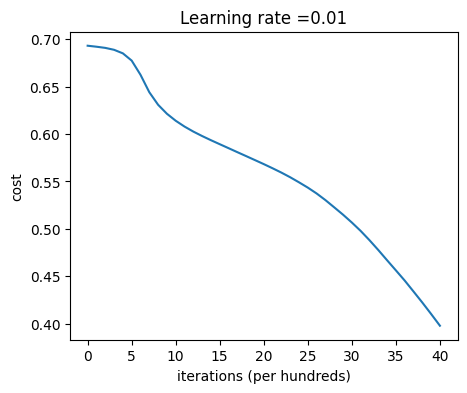

In [ ]:
# Set the dimensions of each layer
layers_dims = [3072, 20, 7, 5, 1] #  4-layer model

parameters = L_layer_model(train_set_x, y_train, layers_dims,learning_rate = 0.01, num_iterations = 4001, print_cost = True)

Cost of first iteration 0 0.693020


## 8 - Testing the network on dog/not dog case

Congrats on implementing all the functions required for building a deep neural network! We will put all these together to build an L-layer neural network to see how the network works on the dog/not dog data.


In [ ]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model

    Returns:
    p -- predictions for the given dataset X
    """

    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))

    # Forward propagation
    probas, caches = L_model_forward(X, parameters)


    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))

    return p

In [ ]:
ptrain = predict(train_set_x, y_train,parameters)
ptest = predict(test_set_x, y_test,parameters)

Accuracy: 0.8515000000000004
Accuracy: 0.665


## 9 Questions
1. How many weights are in a fully connected neural network with input dimension 5, output dimension 1, and 3 hidden layers (not including the output layer) with 7 activation units each (no bias terms)?

> Answer:

>>
*   From Input layer to 1st Hidden layer = 5 * 7
*   Between two hidden layers = 2* (7 * 7) = 2 * 49
*   From last hidden layer to output = 7 * 1

>> Total weights = 5 * 7 + 2 * 49 + 7 * 1 = 140


2. For each of the following loss functions which activation function in the last layer is appropriate and why?
i.Squared loss: Linear, Softmax, or Sigmoid?
ii. Negative Log-Likelihood (NLL) loss: Linear, Softmax, or Sigmoid?

>Answer:

>> (i)   Squared loss: Linear, Softmax, or Sigmoid?

>>>
*   Appropriate Activation Function: Linear
*   Explanation: When using the squared loss (also known as Mean Squared Error, MSE) as the loss function, the goal is to perform regression tasks where the target is continuous. The linear activation function in the last layer is appropriate because it allows the network to predict continuous values without any specific range limitations. This activation doesn't constrain the output values and lets them take any real number.



>> (ii)  Negative Log-Likelihood (NLL) loss: Linear, Softmax, or Sigmoid?

>>>
*   Appropriate Activation Function: Softmax
*  Explanation: The negative log-likelihood loss is commonly used for multi-class classification tasks. The Softmax activation function is appropriate for the last layer because it normalizes the outputs into a probability distribution over multiple classes. This is important when we want the network to provide class probabilities, and it ensures that the predicted values are non-negative and sum to 1. Sigmoid is used for binary classification problems, not multi-class, as it can only model two classes with values between 0 and 1.






3. In part 7, Comment on the cost versus iterations curve, is it smooth or noisy? Explain the shape of the curve, why does it flatten out, then go down more sharply?

>Answer:
>* The curve initially starts flat, indicating slow progress in the model's learning. It then exhibits a decay phase where the cost decreases, but there may be slight upward trends due to noise or fluctuations. Subsequently, it flattens out as the model approaches convergence, and finally, it goes down more sharply as the model fine-tunes and reduces noise in its solution.


4. In Part 8, Explain what the test and training set accuracy values shown above are telling you about your model and parameter selection. What actions should you take in part 2 of this assignment to improve the performace of your model?
Define your answer in terms of bias and variance, overfitting and underfitting, model complexity, amount of data, etc.

>Answer:

>>*   Training Accuracy (0.8515): The high training accuracy suggests low bias, meaning the model can capture complex patterns in the training data. However, this might indicate high variance, implying the model has overfit the training data by fitting to noise or outliers.
*   Testing Accuracy (0.665): The lower testing accuracy than training accuracy suggests overfitting, where the model doesn't generalize well to unseen data. This could be due to excessive model complexity, which increases variance and reduces generalization. It also implies the need for more data to improve generalization.
* In part 2, addressing these issues might involve reducing model complexity (e.g., using simpler architectures), increasing the amount of training data if possible, applying regularization techniques (e.g., dropout or L2 regularization) to reduce overfitting, and tuning hyperparameters to strike a better bias-variance trade-off.




# Extra Credit

I have attempted below three cases to improve both training and testing accuracy.

The below table summarizes my experiments for multiple scenarios and the train_accuracy and test_accuracy, which significantly improve the above part-8 case. However, the test_accuracy is relatively lower than test_accuracy, which demonstrates the model gets overfitting. One way to address overfitting is through regularization.

|     Case     |      Model      | Learning Rate | Num Iterations | Train Accuracy | Test Accuracy |
|:------------:|:---------------:|:-------------:|:--------------:|:--------------:|:-------------:|
|    Case 1    | 4-layer model   |     0.01      |      3000      |     0.9975     |     0.6749    |
|    Case 2    | 2-layer model   |     0.01      |      3000      |     0.9975     |     0.6949    |
|    Case 3    | 3-layer model   |     0.01      |      3000      |       1        |      0.69     |


Cost after iteration 0: 0.693863
Cost after iteration 100: 0.661892
Cost after iteration 200: 0.612174
Cost after iteration 300: 0.582080
Cost after iteration 400: 0.556209
Cost after iteration 500: 0.530981
Cost after iteration 600: 0.505891
Cost after iteration 700: 0.480789
Cost after iteration 800: 0.455034
Cost after iteration 900: 0.427587
Cost after iteration 1000: 0.398190
Cost after iteration 1100: 0.366552
Cost after iteration 1200: 0.332592
Cost after iteration 1300: 0.297739
Cost after iteration 1400: 0.262336
Cost after iteration 1500: 0.227297
Cost after iteration 1600: 0.194198
Cost after iteration 1700: 0.163669
Cost after iteration 1800: 0.136696
Cost after iteration 1900: 0.113574
Cost after iteration 2000: 0.094398
Cost after iteration 2100: 0.078835
Cost after iteration 2200: 0.066244
Cost after iteration 2300: 0.055990
Cost after iteration 2400: 0.047499
Cost after iteration 2500: 0.040196
Cost after iteration 2600: 0.034116
Cost after iteration 2700: 0.029403
Cost

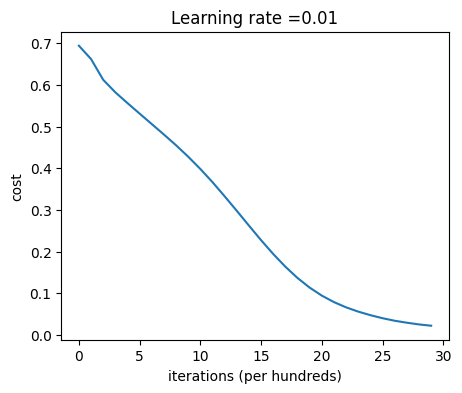

In [ ]:
# Set the dimensions of each layer
# CASE-1: I have also attempted 4-layer model but with different layer sizes for better learning as follows:
layers_dims = [3072, 128, 64, 8, 1] #  4-layer model

# I have attempted to use the same learning rate and decreased number of iterations to 3000.
parameters = L_layer_model(train_set_x, y_train, layers_dims,learning_rate = 0.01, num_iterations = 3000 , print_cost = True)

In [ ]:
ptrain = predict(train_set_x, y_train,parameters)
ptest = predict(test_set_x, y_test,parameters)

Accuracy: 0.9975000000000005
Accuracy: 0.6749999999999999


Cost after iteration 0: 1.277463
Cost after iteration 100: 0.589044
Cost after iteration 200: 0.514157
Cost after iteration 300: 0.480211
Cost after iteration 400: 0.456723
Cost after iteration 500: 0.436212
Cost after iteration 600: 0.416548
Cost after iteration 700: 0.396936
Cost after iteration 800: 0.376816
Cost after iteration 900: 0.356335
Cost after iteration 1000: 0.335328
Cost after iteration 1100: 0.314088
Cost after iteration 1200: 0.292560
Cost after iteration 1300: 0.271008
Cost after iteration 1400: 0.249854
Cost after iteration 1500: 0.229269
Cost after iteration 1600: 0.209313
Cost after iteration 1700: 0.190371
Cost after iteration 1800: 0.172551
Cost after iteration 1900: 0.156030
Cost after iteration 2000: 0.140879
Cost after iteration 2100: 0.127090
Cost after iteration 2200: 0.114631
Cost after iteration 2300: 0.103446
Cost after iteration 2400: 0.093432
Cost after iteration 2500: 0.084514
Cost after iteration 2600: 0.076589
Cost after iteration 2700: 0.069566
Cost

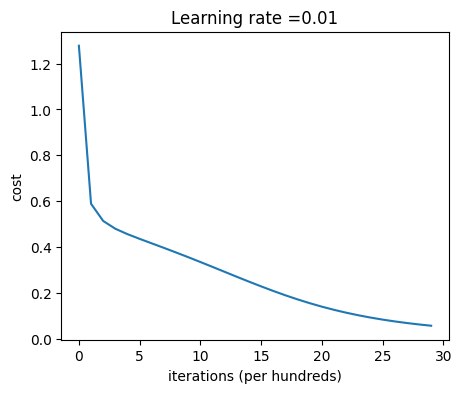

Accuracy: 0.9975000000000005
Accuracy: 0.6949999999999998


In [ ]:
# Set the dimensions of each layer
# CASE-2:  I have also attempted 2-layer model but with different layer sizes for better learning as follows:
layers_dims = [3072, 128,  1] #  2-layer model

# I have attempted to use the same learning rate and decreased number of iterations to 3000.
parameters = L_layer_model(train_set_x, y_train, layers_dims,learning_rate = 0.01, num_iterations = 3000 , print_cost = True)

ptrain = predict(train_set_x, y_train,parameters)
ptest = predict(test_set_x, y_test,parameters)

Cost after iteration 0: 1.850059
Cost after iteration 100: 0.505298
Cost after iteration 200: 0.363194
Cost after iteration 300: 0.283703
Cost after iteration 400: 0.217433
Cost after iteration 500: 0.161993
Cost after iteration 600: 0.119067
Cost after iteration 700: 0.087901
Cost after iteration 800: 0.066014
Cost after iteration 900: 0.050809
Cost after iteration 1000: 0.040137
Cost after iteration 1100: 0.032513
Cost after iteration 1200: 0.026926
Cost after iteration 1300: 0.022736
Cost after iteration 1400: 0.019515
Cost after iteration 1500: 0.016982
Cost after iteration 1600: 0.014957
Cost after iteration 1700: 0.013310
Cost after iteration 1800: 0.011949
Cost after iteration 1900: 0.010811
Cost after iteration 2000: 0.009846
Cost after iteration 2100: 0.009020
Cost after iteration 2200: 0.008308
Cost after iteration 2300: 0.007688
Cost after iteration 2400: 0.007144
Cost after iteration 2500: 0.006663
Cost after iteration 2600: 0.006237
Cost after iteration 2700: 0.005856
Cost

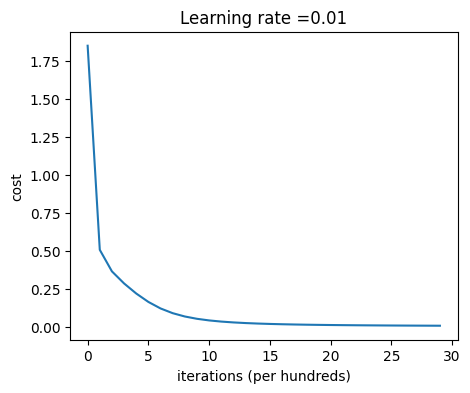

Accuracy: 1.0000000000000004
Accuracy: 0.69


In [ ]:
# Set the dimensions of each layer
# CASE-3: I have attempted 3-layer model but with different layer sizes for better learning as follows:
layers_dims = [3072, 512,  128, 1] #  3-layer model

# I have attempted to use the same learning rate and decreased number of iterations to 3000.
parameters = L_layer_model(train_set_x, y_train, layers_dims,learning_rate = 0.01, num_iterations = 3000 , print_cost = True)

ptrain = predict(train_set_x, y_train,parameters)
ptest = predict(test_set_x, y_test,parameters)